In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [4]:
df = pd.read_csv('modified_data_1.2.csv',index_col=0)
df.head()

Division Wealth Index  Age at 1st Birth  Child Age  stunting  underweight  \
0  barisal      poorest                16         13         0            1   
1  barisal      poorest                18         47         0            1   
2  barisal       poorer                16         23         0            0   
3  barisal       poorer                21         11         0            0   
4  barisal       middle                15         51         1            1   

   wasting  diar  fever  ari  Mother_BMI wealth_index_cat  residence     sex  \
0        1   0.0    0.0    1       20.96             poor          1  female   
1        1   0.0    0.0    0       19.71             poor          1  female   
2        0   0.0    0.0    0       20.66             poor          1  female   
3        0   0.0    0.0    0       18.41             poor          1  female   
4        0   0.0    0.0    0       19.47             rich          1  female   

   currently_working_mot  parents_edu  
0                    0.0          0.0  
1                    0.0          0.0  
2                    1.0          0.0  
3                    0.0          0.0  
4                    1.0          0.0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6965 entries, 0 to 6964
Data columns (total 16 columns):
Division                 6965 non-null object
Wealth Index             6965 non-null object
Age at 1st Birth         6965 non-null int64
Child Age                6965 non-null int64
stunting                 6965 non-null int64
underweight              6965 non-null int64
wasting                  6965 non-null int64
diar                     6959 non-null float64
fever                    6963 non-null float64
ari                      6965 non-null int64
Mother_BMI               6946 non-null float64
wealth_index_cat         6965 non-null object
residence                6965 non-null int64
sex                      6965 non-null object
currently_working_mot    6964 non-null float64
parents_edu              6963 non-null float64
dtypes: float64(5), int64(7), object(4)
memory usage: 925.0+ KB


In [12]:
# encoding 'wealth_index_cat'
#--------------------------------

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['wealth_index_cat'] = le.fit_transform(df['wealth_index_cat'])

In [16]:
df.head()

Division Wealth Index  Age at 1st Birth  Child Age  stunting  underweight  \
0  barisal      poorest                16         13         0            1   
1  barisal      poorest                18         47         0            1   
2  barisal       poorer                16         23         0            0   
3  barisal       poorer                21         11         0            0   
4  barisal       middle                15         51         1            1   

   wasting  diar  fever  ari  Mother_BMI  wealth_index_cat  residence     sex  \
0        1   0.0    0.0    1       20.96                 0          1  female   
1        1   0.0    0.0    0       19.71                 0          1  female   
2        0   0.0    0.0    0       20.66                 0          1  female   
3        0   0.0    0.0    0       18.41                 0          1  female   
4        0   0.0    0.0    0       19.47                 1          1  female   

   currently_working_mot  parents_edu  
0                    0.0          0.0  
1                    0.0          0.0  
2                    1.0          0.0  
3                    0.0          0.0  
4                    1.0          0.0

In [17]:
df.describe()

Age at 1st Birth    Child Age     stunting  underweight      wasting  \
count       6965.000000  6965.000000  6965.000000  6965.000000  6965.000000   
mean          18.252692    29.563245     0.361091     0.321321     0.141709   
std            3.297983    17.036364     0.480351     0.467017     0.348776   
min           12.000000     0.000000     0.000000     0.000000     0.000000   
25%           16.000000    14.000000     0.000000     0.000000     0.000000   
50%           18.000000    30.000000     0.000000     0.000000     0.000000   
75%           20.000000    45.000000     1.000000     1.000000     0.000000   
max           46.000000    59.000000     1.000000     1.000000     1.000000   

              diar        fever          ari   Mother_BMI  wealth_index_cat  \
count  6959.000000  6963.000000  6965.000000  6946.000000       6965.000000   
mean      0.048426     0.449088     0.053984    21.694767          0.594831   
std       0.214681     0.497437     0.226003     4.581962          0.490960   
min       0.000000     0.000000     0.000000    12.200000          0.000000   
25%       0.000000     0.000000     0.000000    18.700000          0.000000   
50%       0.000000     0.000000     0.000000    20.950000          1.000000   
75%       0.000000     1.000000     0.000000    23.960000          1.000000   
max       1.000000     1.000000     1.000000    99.980000          1.000000   

         residence  currently_working_mot  parents_edu  
count  6965.000000            6964.000000  6963.000000  
mean      0.685858               0.250862     0.300302  
std       0.464207               0.433540     0.458422  
min       0.000000               0.000000     0.000000  
25%       0.000000               0.000000     0.000000  
50%       1.000000               0.000000     0.000000  
75%       1.000000               1.000000     1.000000  
max       1.000000               1.000000     1.000000

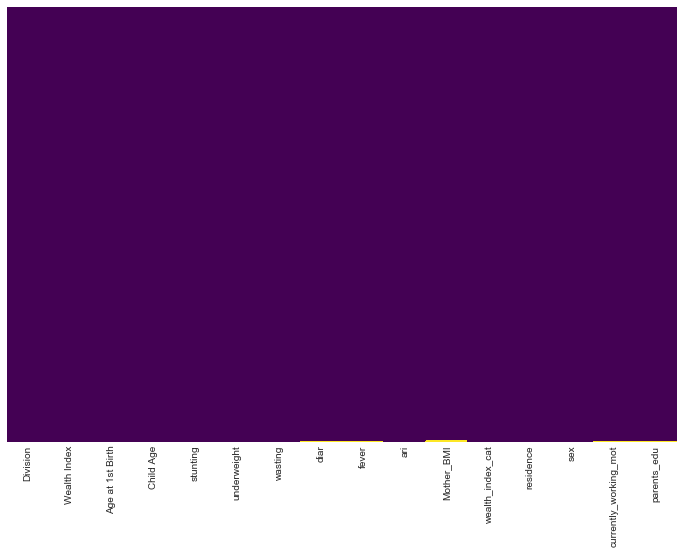

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),cmap='viridis',cbar=False,yticklabels=False)

In [24]:
df = df.fillna(df[['diar','fever','Mother_BMI','currently_working_mot','parents_edu']].mean())

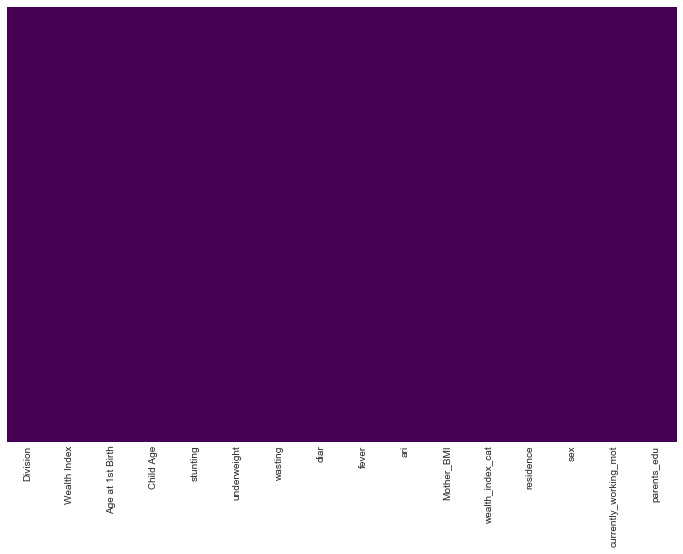

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),cmap='viridis',cbar=False,yticklabels=False)

In [26]:
X = df.iloc[:,[2,7,8,9,10,11,14,15]].values
Y = df.iloc[:,5].values

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.2, random_state = 0)

In [34]:
from sklearn.tree import DecisionTreeClassifier
dClass = DecisionTreeClassifier(criterion='entropy', random_state = 0)
dClass.fit(x_train,y_train)
y_pred = dClass.predict(x_test)

In [35]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[660 281]
 [305 147]]
             precision    recall  f1-score   support

          0       0.68      0.70      0.69       941
          1       0.34      0.33      0.33       452

avg / total       0.57      0.58      0.58      1393



In [39]:
print('\t\t\tapply PCA:\n\t\t\t----------------\n\t\t\tso, let\'s apply pca')

			apply PCA:
			----------------
			so, let's apply pca
